# Методы семантического анализа текстов

## Сходство между словами

You shall know a word by the company it keeps. 

*Frith*

 Варкалось. Хливкие шорьки<br>
   Пырялись по наве,<br>
   И хрюкотали зелюки,<br>
   Как мюмзики в мове.<br>

*Кэррол*

Не очень ясно что именно могут делать *зелюки*. Но если мы узнаем кто еще может *хрюкотать*, то мы можем посчитать, что нашли слово со сходным значением или, как минимум, относящееся к одной смысловой группе.

Аналогично мы не понимаем кто (что) такие *шорьки*. Если они бывают ответственными - это одно, если электронными - другое.

- Возьмем текст и разделим его на слова, выделим слова со значимыми частями речи.
- Пройдемся по всем словам текста. Возьмем несколько соседних слов справа и слева от текущего. Посчитаем частоты их совместной встречаемости.
- Отсеем все слова, которые встречаются слишком редко или с малым количеством других слов.

In [1]:
import pandas as pd
import re
import nltk
import nltk.data
from tqdm.notebook import tqdm

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/edward/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
with open("data/lenta2018_summer2.txt", encoding="utf-8") as newsfile: # Файл с новостями.
    text = newsfile.read()
    div_text = text.split("=====\n")[1:]
    text_news = [(n.split('\n')[0], n.split('\n')[1], n.split('\n')[2], '\n'.join(n.split('\n')[3:])) 
                 for n in div_text]
    news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'Tag', 'News'])

In [3]:
texts = list(news['News'])
texts[1111]

'Столичная полиция проверяет информацию о вымогательстве таксистом денег у гражданина Вьетнама, пишет «Московский комсомолец» со ссылкой на собственные источники. По информации газеты, мужчина, на родине работающий чиновником в правительстве, неоднократно бывал в России, знаком с ее обычаями и в этот раз, садясь в такси, предварительно договорился с водителем об оплате по счетчику. «Мужчина был настолько уверен в своем знании российской действительности, что даже не мог предположить, что станет жертвой мошенника», — отмечает издание. Однако по прибытии в аэропорт Шереметьево таксист потребовал заплатить ему 23,3 тысячи рублей, что не устроило пассажира. В ответ водитель заблокировал двери и окна и повез вьетнамца обратно, попутно угрожая ему расправой. Тот в итоге согласился отдать требуемую сумму, поскольку боялся за свою жизнь. Оказавшись в аэропорту, мужчина обратился в полицию, так как запомнил номер машины, однако ни такси, ни руководителя таксопарка найти не удалось. Как уточняет

Давайте поделим тексты на предложения, а предложения на слова

In [4]:
def text_to_wordlist(text):
    text = re.sub('[^a-zA-Zа-яА-яёЁ]', ' ', text)
    words = text.lower().split()
    return words

In [5]:
text_to_wordlist(texts[1111])

['столичная',
 'полиция',
 'проверяет',
 'информацию',
 'о',
 'вымогательстве',
 'таксистом',
 'денег',
 'у',
 'гражданина',
 'вьетнама',
 'пишет',
 'московский',
 'комсомолец',
 'со',
 'ссылкой',
 'на',
 'собственные',
 'источники',
 'по',
 'информации',
 'газеты',
 'мужчина',
 'на',
 'родине',
 'работающий',
 'чиновником',
 'в',
 'правительстве',
 'неоднократно',
 'бывал',
 'в',
 'россии',
 'знаком',
 'с',
 'ее',
 'обычаями',
 'и',
 'в',
 'этот',
 'раз',
 'садясь',
 'в',
 'такси',
 'предварительно',
 'договорился',
 'с',
 'водителем',
 'об',
 'оплате',
 'по',
 'счетчику',
 'мужчина',
 'был',
 'настолько',
 'уверен',
 'в',
 'своем',
 'знании',
 'российской',
 'действительности',
 'что',
 'даже',
 'не',
 'мог',
 'предположить',
 'что',
 'станет',
 'жертвой',
 'мошенника',
 'отмечает',
 'издание',
 'однако',
 'по',
 'прибытии',
 'в',
 'аэропорт',
 'шереметьево',
 'таксист',
 'потребовал',
 'заплатить',
 'ему',
 'тысячи',
 'рублей',
 'что',
 'не',
 'устроило',
 'пассажира',
 'в',
 'ответ

In [6]:
def text_to_sentences(text):
    sentences = []
    tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')
    raw_sentences = tokenizer.tokenize(text.strip())
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(text_to_wordlist(raw_sentence))
    return sentences

In [7]:
text_to_sentences(texts[1111])

[['столичная',
  'полиция',
  'проверяет',
  'информацию',
  'о',
  'вымогательстве',
  'таксистом',
  'денег',
  'у',
  'гражданина',
  'вьетнама',
  'пишет',
  'московский',
  'комсомолец',
  'со',
  'ссылкой',
  'на',
  'собственные',
  'источники'],
 ['по',
  'информации',
  'газеты',
  'мужчина',
  'на',
  'родине',
  'работающий',
  'чиновником',
  'в',
  'правительстве',
  'неоднократно',
  'бывал',
  'в',
  'россии',
  'знаком',
  'с',
  'ее',
  'обычаями',
  'и',
  'в',
  'этот',
  'раз',
  'садясь',
  'в',
  'такси',
  'предварительно',
  'договорился',
  'с',
  'водителем',
  'об',
  'оплате',
  'по',
  'счетчику'],
 ['мужчина',
  'был',
  'настолько',
  'уверен',
  'в',
  'своем',
  'знании',
  'российской',
  'действительности',
  'что',
  'даже',
  'не',
  'мог',
  'предположить',
  'что',
  'станет',
  'жертвой',
  'мошенника',
  'отмечает',
  'издание'],
 ['однако',
  'по',
  'прибытии',
  'в',
  'аэропорт',
  'шереметьево',
  'таксист',
  'потребовал',
  'заплатить',
 

Что за тип у sentences?

In [8]:
all_sentences = [text_to_sentences(x) for x in tqdm(texts)]

In [9]:
all_sentences = sum(all_sentences, [])

## Модель Word2Vec

Модель описана в статье [Т.Миколова и др.](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) Идея метода основывается на оптимизации функционала, основанного на логарифмах вероятностей совместной встречаемости слов. Помимо этого, вводятся отрицательные примеры, вероятности которых не суммируются, а вычитаются. При этом отрицательных примеров берется больше, чем положительных.

In [2]:
from gensim.models.word2vec import Word2Vec

In [17]:
%%time

# список параметров, которые можно менять по вашему желанию
num_features = 300  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 3     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели

model = Word2Vec(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

NameError: name 'all_sentences' is not defined

In [12]:
model.wv.most_similar('путин')

[('президент', 0.8986347317695618),
 ('трамп', 0.8722620010375977),
 ('владимир', 0.8586497902870178),
 ('порошенко', 0.8527927398681641),
 ('путиным', 0.8412402868270874),
 ('лидер', 0.8352086544036865),
 ('трампу', 0.8303096294403076),
 ('эрдоган', 0.8247377276420593),
 ('брюссель', 0.8204637169837952),
 ('лукашенко', 0.8203001618385315)]

In [13]:
model.wv.most_similar('интернет')

[('онлайн', 0.8577691912651062),
 ('подозрительные', 0.8361413478851318),
 ('сервиса', 0.8298308253288269),
 ('бренда', 0.8192861080169678),
 ('сервис', 0.8161466121673584),
 ('сеть', 0.8066598773002625),
 ('ретейлера', 0.8004530668258667),
 ('опубликованы', 0.7996451258659363),
 ('google', 0.7953473329544067),
 ('объявлений', 0.7916809320449829)]

In [14]:
model.wv.most_similar('ученые')

[('исследователи', 0.9443176984786987),
 ('астрофизики', 0.9005377292633057),
 ('выяснили', 0.8826960325241089),
 ('специалисты', 0.8688143491744995),
 ('проанализировали', 0.8546706438064575),
 ('гарвардского', 0.832602858543396),
 ('университета', 0.8219370245933533),
 ('эксперты', 0.821733832359314),
 ('палеонтологи', 0.8178375959396362),
 ('показали', 0.7929621934890747)]

### Обучение собственной модели в Word2Vec


Возьмем по тысяче научных текстов из пяти разных областей науки.

In [3]:
import pymorphy2

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 12)

In [18]:
sci_texts = pd.read_csv("data/kaggle-science-texts_train.tsv", header=0, sep = ';')

In [19]:
# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models import KeyedVectors # Семантические вектора.

import numpy as np

In [20]:
tmp_dict2 = {} # Кеш значимых слов.

morph = pymorphy2.MorphAnalyzer()

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy2(text):
    output = []
    # Делим на предложения самым страшным из возможных образов.
    sentences = text.split('.')
    for sentence in sentences:
        tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', sentence)
        # Берем предложения не менее чем из 5 слов.
        if len(tokens)<=4:
            continue
        words = []
        for t in tokens:
            # Если токен уже был закеширован, быстро возьмем результат из него.
            if t in tmp_dict2.keys():
                words.append(tmp_dict2[t])
            # Слово еще не встретилось, будем проводить медленный морфологический анализ.
            else:
                pv = morph.parse(t)
                if pv[0].tag.POS != None:
                    word = pv[0].normal_form+"_"+pv[0].tag.POS
                    # Отправляем слово в результат, ...
                    words.append(word)
                    # ... и кешируем результат его разбора.
                    tmp_dict2[t] = word
        output.append(words)
                    
    return output

In [21]:
all_sentences = []
for text in tqdm(sci_texts.Text):
    all_sentences.extend(normalizePymorphy2(text))

In [22]:
%%time

# список параметров, которые можно менять по вашему желанию
num_features = 50  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 4     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели

model = Word2Vec(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

CPU times: user 2min 7s, sys: 431 ms, total: 2min 8s
Wall time: 41 s


In [23]:
# Финализируем нашу модель. Ее нельзя будет доучить теперь, но она начнет занимать гораздо меньше места
model.init_sims(replace=True)

In [22]:
# Посмотрим на самые похожие слова.
model.wv.most_similar('система_NOUN')

[('подсистема_NOUN', 0.6997876763343811),
 ('непрерывный_ADJF', 0.6710934638977051),
 ('принцип_NOUN', 0.6434319615364075),
 ('структура_NOUN', 0.6407032012939453),
 ('медиапространство_NOUN', 0.6364892721176147),
 ('модель_NOUN', 0.6329137086868286),
 ('среда_NOUN', 0.6326640248298645),
 ('пространство_NOUN', 0.624320924282074),
 ('базис_NOUN', 0.6048912405967712),
 ('процесс_NOUN', 0.5997380614280701)]

In [23]:
model.wv.most_similar('говорить_VERB')

[('говорят_CONJ', 0.9175846576690674),
 ('свидетельствовать_VERB', 0.7635580897331238),
 ('сообщать_VERB', 0.7504289746284485),
 ('писать_VERB', 0.7492306232452393),
 ('свидетельствующий_ADJF', 0.7391645908355713),
 ('заявлять_VERB', 0.7213413715362549),
 ('говориться_VERB', 0.720465898513794),
 ('забывать_VERB', 0.7166651487350464),
 ('убеждать_VERB', 0.6896728277206421),
 ('рассказывать_VERB', 0.6842306852340698)]

In [24]:
model.wv.most_similar('ученик_NOUN')

[('учитель_NOUN', 0.7764545679092407),
 ('воспитатель_NOUN', 0.7756606340408325),
 ('учащийся_ADJF', 0.7525753974914551),
 ('педагог_NOUN', 0.7456491589546204),
 ('слушатель_NOUN', 0.7327735424041748),
 ('ребята_NOUN', 0.7081397175788879),
 ('ребёнок_NOUN', 0.70301353931427),
 ('воспитанник_NOUN', 0.6897046566009521),
 ('студент_NOUN', 0.6873106956481934),
 ('родитель_NOUN', 0.6785286068916321)]

In [25]:
model.wv.most_similar('орех_NOUN')

[('сушёный_ADJF', 0.9211860299110413),
 ('лука_NOUN', 0.9151583909988403),
 ('молотый_ADJF', 0.9038130044937134),
 ('репчатый_ADJF', 0.9033757448196411),
 ('перец_NOUN', 0.9014613032341003),
 ('грецкий_ADJF', 0.9008510708808899),
 ('кориандр_NOUN', 0.8975204825401306),
 ('плодовый_ADJF', 0.8963594436645508),
 ('зелень_NOUN', 0.8943449854850769),
 ('вишня_NOUN', 0.8941789865493774)]

Итак, вместо самих слов мы можем использовать их векторные представления в некотором семантическом пространстве.

<img src="img/cartoon-espresso-word2vec.jpg">

Беда Word2Vec состоит в том, что он генерирует только один вектор на каждое слово. То есть он не различает различных смыслов одного слова.

<img src="img/cartoon-citizen-data-scientist.jpg">

Можно найти лишнее слово в последовательности.

In [26]:
model.wv.doesnt_match(['лука_NOUN', 'перец_NOUN', 'ученик_NOUN', 'плодовый_ADJF'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'ученик_NOUN'

In [27]:
# Размер проанализированного корпуса
model.corpus_total_words

9523201

Теперь вернемся к размеру векторов.

In [28]:
model.vector_size

50

Можно провести аналогию с SVD. У нас строится некоторое пространство, размерность которого определяется числом латентных переменных в системе - скрытых параметров, каждый из которых отвечает за какой-то "смысл": размер, цвет, политика, время, абстрактность, падеж слова и прочее.

Количество признаков в этом пространстве определяется числом подобных скрытых переменных.

В полученном пространстве работают векторные операции. Если обучиться на достаточно большом количестве текстов, можно получить следующие эффекты.

![](img/w2v_vect.png)

![](img/w2v_vect2.png)



На хорошо обученной модели можно даже превратить индекс в город и наоборот при помощи векторных операций.

Давайте посмотрим на реальное расположение слов в этом пространстве. Для этого нам потребуется UMAP, а то как еще мы преобразуем 300-мерное пространство в плоскость?

In [14]:
from umap import UMAP
from copy import copy

In [30]:
trees = pd.read_csv("data/trees.txt", sep='\t', names=['trees'])
herbs = pd.read_csv("data/herbs.txt", sep='\t', names=['herbs'])
trees = trees['trees'].str.lower().unique()
herbs = herbs['herbs'].str.lower().unique()

In [31]:
men_avg, women_avg = np.zeros(model.vector_size), np.zeros(model.vector_size)
men_count, women_count = 0, 0
men_vect, women_vect, animal_type, animal_no = [], [], [], []
dif_vect = []
names = []
men_names, women_names = [], []

for m in trees:
    if m.strip().lower()+'_NOUN' in model.wv.vocab.keys():
        mv = model.wv[m.strip().lower()+'_NOUN']
        men_avg += mv
        men_count += 1
        men_vect.append(mv)
        men_names.append(m)
        animal_type.append(1)
    else:
        print('tree -', m.lower())
        
for w in herbs:
    if w.strip().lower()+'_NOUN' in model.wv.vocab.keys():
        wv = model.wv[w.strip().lower()+'_NOUN']
        women_avg += wv
        women_count += 1
        women_vect.append(wv)
        women_names.append(w)
        animal_type.append(0)
    else:
        print('herb -', w)

        
for i in range(men_count):
    mv = men_vect[i]
    animal_no.append(i)
    for j in range(women_count):
        wv = women_vect[j]
        dif_vect.append(mv - wv)
        names.append([men_names[i], women_names[j]])

men_avg /= men_count
women_avg /= women_count

dif_avg = men_avg - women_avg
cosines = KeyedVectors.cosine_similarities(dif_avg, dif_vect)

#print(list(zip(names, cosines)))
print([(n, c) for n, c in list(zip(names, cosines)) if c>0.7])

tree - акация
tree - береза
tree - клен
tree - ясень
tree - конский каштан
tree - ирга
tree - черемуха
tree - рододендрон
tree - самшит
tree - бересклет
tree - магнолия
tree - карагана
tree - лох
tree - маакия
tree - можжевельник
tree - тис
tree - клекачка
tree - скумпия
tree - калина
tree - крушина
tree - терн
tree - сирень
tree - чубушник
tree - барбарис
tree - туя
tree - багульник
tree - ракита
tree - ракитник
tree - глициния
tree - кипарис
tree - бирючина
tree - платан
tree - оливка
tree - алыча
tree - гуава
tree - дуриан
tree - карамбола
tree - кумкват
tree - маракуйя
tree - мушмулла
tree - нектарин
tree - папайя
tree - помело
tree - померанец
tree - рамбутан
herb - аррорут
herb - исландский мох
herb - волосатик
herb - белокопытник
herb - девясил
herb - мята
herb - аконит
herb - наперстянка
herb - пион
herb - валериана
herb - ревень
herb - вьюнок
herb - безвременник
herb - бадьян
herb - шалфей
herb - хрен
herb - гвоздика
herb - василек
herb - чертополох
herb - остролист
herb - реп

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:902: RuntimeWarning: invalid value encountered in true_divide
  similarities = dot_products / (norm * all_norms)


In [32]:
all_vect, all_names = copy(men_vect), copy(men_names)
all_vect.extend(women_vect)
all_names.extend(women_names)

umaped_vct=UMAP().fit_transform(all_vect)

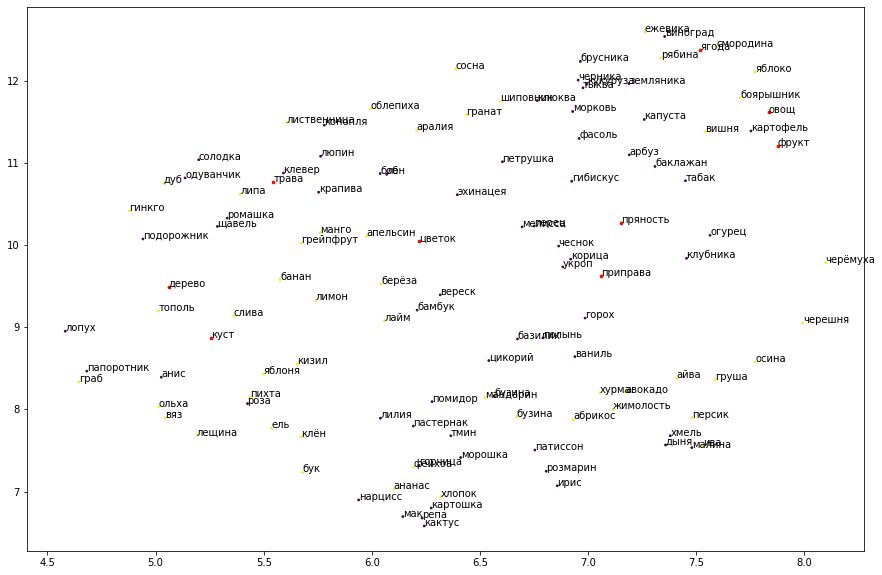

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], c=animal_type, s=3)

for word in ['фрукт', 'овощ', 'ягода', 'приправа', 'пряность', 'дерево', 'трава', 'цветок', 'куст']:
    ind = all_names.index(word)
    ax.scatter(umaped_vct[ind, 0], umaped_vct[ind, 1], c='r', s=7)

for n, v in zip(all_names, umaped_vct):
    ax.annotate(n, (v[0], v[1]))

plt.show()

Это те же самые данные, но на модели, обученной на корпусе Araneum.

![](img/herbs-trees-W2V.png)

----

### Использование предобученных моделей

Теперь загрузим модель, обученную разработчиками проекта <a href="http://rusvectores.org/ru/models/">RusVectores</a> для русского языка на новостях. В зависимости от того, откуда вы берете модели, они могут загружаться по-разному. Более того, модель можно обучить самому - для этого нужно просто взять много размеченных текстов.

In [36]:
model_w2v = KeyedVectors.load_word2vec_format('data/araneum_upos_skipgram_300_2_2018.vec.gz')

Теперь можно получить представление слов в новом пространстве. Имейте в виду, что в данной модели они идут с частями речи!

In [37]:
model_w2v['огонь_NOUN']

array([-2.69010e-02,  1.08851e-01,  1.13100e-03, -2.76620e-02,
       -2.50680e-02, -4.58600e-03, -1.26100e-03, -3.79600e-03,
       -7.53080e-02, -2.39490e-02,  2.00400e-02,  6.10330e-02,
        7.40810e-02,  9.56330e-02, -1.11446e-01,  4.60380e-02,
       -2.24540e-02, -2.46080e-02, -8.82250e-02, -1.53180e-02,
       -3.66000e-04, -9.46770e-02,  1.33686e-01,  5.88400e-03,
       -5.05470e-02,  8.13820e-02, -2.88090e-02, -7.00070e-02,
        8.74950e-02, -8.31860e-02, -2.48210e-02, -3.82660e-02,
        6.13210e-02, -6.45530e-02,  2.66400e-03,  8.36140e-02,
       -3.73850e-02,  3.63260e-02, -1.20000e-04, -6.90000e-02,
        1.49810e-02,  3.03880e-02, -2.17280e-02,  2.79400e-02,
       -5.22550e-02,  1.96660e-02,  1.52499e-01,  7.27100e-02,
       -2.11140e-02,  5.69930e-02, -3.07870e-02,  4.09070e-02,
        6.49290e-02,  1.91730e-02,  2.50080e-02, -2.94090e-02,
        6.33780e-02,  1.09028e-01,  5.66630e-02, -3.62330e-02,
        4.96900e-02, -7.09280e-02,  2.74420e-02, -1.986

В пространстве Word2Vec возможны векторные операции. Попробуем их.

In [38]:
#model_w2v.most_similar(positive=[u'пожар_NOUN'])
#model_w2v.most_similar(positive=[u'пожар_NOUN'], negative=[u'пламя_NOUN' ])
model_w2v.most_similar(positive=[u'топливо_NOUN', u'творог_NOUN'], negative=[u'нефть_NOUN' ])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'император_NOUN' ], negative=[u'мужчина_NOUN'])
#model_w2v.most_similar(positive=[u'король_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
#model_w2v.most_similar(positive=[u'президент_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
#model_w2v.most_similar(negative=[u'король_NOUN', u'мужчина_NOUN'], positive=[u'женщина_NOUN'])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'король_NOUN' ])
#model_w2v.most_similar(positive=[u'берлин_PROPN', u'москва_PROPN' ], negative=[u'германия_PROPN'])


[('брынза_NOUN', 0.5984689593315125),
 ('простокваша_NOUN', 0.5953606367111206),
 ('сметана_NOUN', 0.5938137173652649),
 ('йогурт_NOUN', 0.5773833990097046),
 ('ряженка_NOUN', 0.5772802233695984),
 ('творожок_NOUN', 0.5761341452598572),
 ('рикотт_NOUN', 0.5747571587562561),
 ('творожный_ADJ', 0.5596144199371338),
 ('фарш_NOUN', 0.5593909025192261),
 ('пюре_NOUN', 0.55317223072052)]

Переразметим наши тексты так, чтобы они содержали в себе и часть речи, понятную загруженной модели.

In [8]:
# Список значимых частей речи.
conv_pos = {'ADJF':'ADJ', 'ADJS':'ADJ', 'ADV':'ADV', 'NOUN':'NOUN', 'VERB':'VERB'}

tmp_dict = {}
nones = {}

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy3(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        if t in tmp_dict.keys():
            words.append(tmp_dict[t])
        elif t in nones.keys():
            pass
        else:
            pv = morph.parse(t)
            if pv[0].tag.POS != None:
                if pv[0].tag.POS in conv_pos.keys():
                    words.append(pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS])
                    tmp_dict[t] = pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS]
                else:
                    nones[t] = ""
                    
    return words

Теперь посмотрим какова размерность векторов, хранимых в модели, и сколько в ней слов.<br>
Размерность векторов 300 - с запасом. Почти 250 000 слов - тоже очень хорошо.

In [40]:
print(model_w2v.vector_size)
print(len(model_w2v.index2word))

300
196620


In [41]:
model_w2v.index2word[:50]

['год_NOUN',
 'мочь_VERB',
 'человек_NOUN',
 'время_NOUN',
 'работа_NOUN',
 'новый_ADJ',
 'становиться_VERB',
 'также_ADV',
 'очень_ADV',
 'день_NOUN',
 'первый_ADJ',
 'компания_NOUN',
 'являться_VERB',
 'ребенок_NOUN',
 'иметь_VERB',
 'система_NOUN',
 'место_NOUN',
 'получать_VERB',
 'большой_ADJ',
 'жизнь_NOUN',
 'вопрос_NOUN',
 'хороший_ADJ',
 'должный_ADJ',
 'вид_NOUN',
 'город_NOUN',
 'сайт_NOUN',
 'случай_NOUN',
 'дело_NOUN',
 'дом_NOUN',
 'сделать_VERB',
 'давать_VERB',
 'говорить_VERB',
 'россия_PROPN',
 'возможность_NOUN',
 'высокий_ADJ',
 'страна_NOUN',
 'область_NOUN',
 'мир_NOUN',
 'работать_VERB',
 'данный_ADJ',
 'начинать_VERB',
 'часть_NOUN',
 'качество_NOUN',
 'знать_VERB',
 'сказать_VERB',
 'позволять_VERB',
 'хорошо_ADV',
 'хотеть_VERB',
 'нужно_ADV',
 'принимать_VERB']

У нас есть смысл отдельных слов. Построим на его основе смысл текста как среднее арифметическое всех векторов для слов, составляющих данный текст.

In [42]:
index2word_set = set(model_w2v.index2word)

def text_to_vec(text):
    text_vec = np.zeros((model_w2v.vector_size,), dtype="float32")
    n_words = 0

    for word in normalizePymorphy3(text):
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model_w2v[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


In [43]:
with open("data/lenta2018_summer2.txt", encoding="utf-8") as newsfile: # Файл с новостями.
    text = newsfile.read()
    div_text = text.split("=====\n")[1:]
    text_news = [(n.split('\n')[0], n.split('\n')[1], n.split('\n')[2], '\n'.join(n.split('\n')[3:])) 
                 for n in div_text]
    news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'Tag', 'News'])

In [44]:
news.head()

,Header,Date,Tag,News
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,-----,Шведская YouTube-знаменитость Симона Герц (Sim...
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,-----,Перспективный российский многофункциональный и...
2,Знарок лишился еще одного поста,2018/06/01,-----,Санкт-петербургский клуб Континентальной хокке...
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,-----,Следственный комитет по Москве начал проверку ...
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,-----,Более 100 жителей Киева перекрыли проспект Гри...


Рассчитаем вектора всех текстов - они нам еще пригодятся.

In [45]:
w2v_vectors = [text_to_vec(text) for text in news.News]

Найдем текст, самый похожий на текст про Су-57.

In [46]:
vpos=1
v1 = text_to_vec(news.News[vpos])

ms = np.argmin([np.linalg.norm(v1-w2v_vectors[i]) for i in range(news.News.shape[0]) if i!=vpos])
if ms>vpos:
    print(ms+1, news.News[ms+1])
else:
    print(ms, news.News[ms])

412 Российский перспективный многофункциональный истребитель пятого поколения Су-57 имеет «козырь в рукаве», поскольку может оказаться носителем тактического оружия, заменив таким образом истребитель поколения 4++ Су-34, пишет The National Interest. Американский журнал приводит мнение старшего советника и директора программы «Россия и Евразия» Центра стратегических и международных исследований (США) Ольги Оликер, которая полагает, что в действительности Россия не снизила порог применения ядерного оружия. Издание отмечает, что в последнем «Обзоре ядерной политики» США Су-57 упоминается как носитель ядерного оружия. По мнению старшего научного сотрудника Центра комплексных европейских и международных исследований Высшей школы экономики (Россия), в оружейном отсеке Су-57 допускается размещение российской перспективной крылатой ракеты X-50. В июне летчик-испытатель Магомед Толбоев заявил, что Су-57 не имеет мировых аналогов и о нем не могут судить «дилетанты из СМИ», поскольку его «ноу-хау

In [47]:
news.News[vpos]

'Перспективный российский многофункциональный истребитель пятого поколения Су-57 не имеет мировых аналогов и о нем не могут судить «дилетанты из СМИ», поскольку его «ноу-хау являются тайной», о которых знают лишь «профессионалы, испытатели, военное руководство страны». Такую точку зрения РИА Новости высказал летчик-испытатель Магомед Толбоев. «Ни на одном самолете еще никогда не удавалось добиться того, чтобы на крейсерских сверхзвуковых скоростях (1600 километров в час) можно было летать в бесфорсажном режиме. Форсажный режим сопряжен с огромной тратой топлива, а Су-57 может развивать крейсерскую скорость "на номинале". Этого в мире еще не добился никто — ни Франция, ни Англия, ни Rolls-Royce, ни Pratt & Whitney — никто», — говорит Толбоев. Летчик-испытатель называет Су-57 «будущим российской боевой авиации». «В нем реализованы самые передовые технологии и то, что демонстрируется широкой общественности, — это лишь поверхность, остальное знаем только мы — профессионалы, испытатели, вое

In [48]:
from umap import UMAP

In [49]:
umap_news=UMAP()
umaped_vct=umap_news.fit_transform(w2v_vectors)

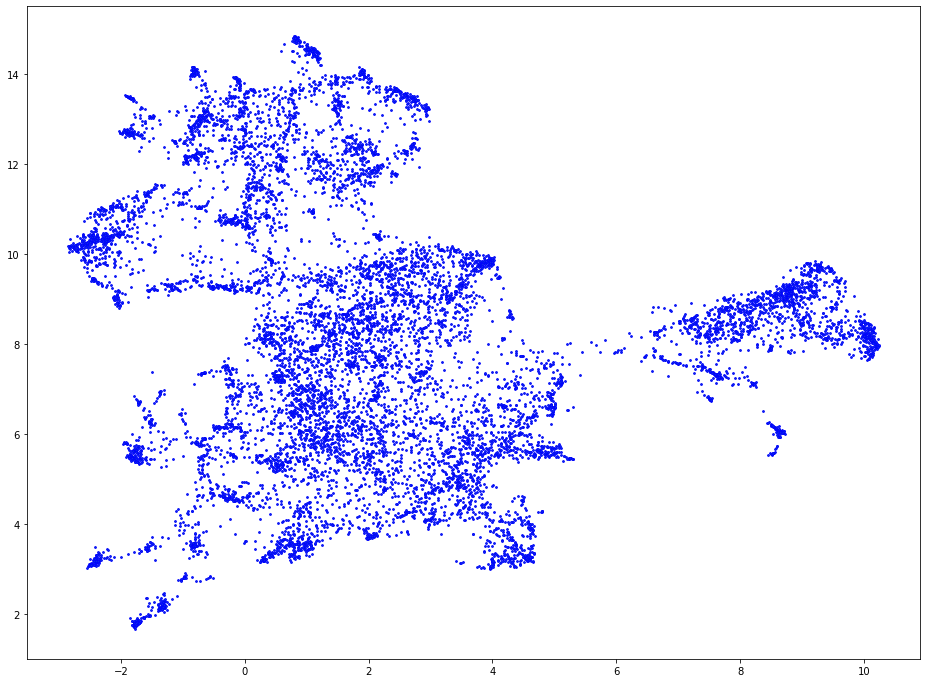

In [50]:
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

In [37]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy.random import choice

Посмотрим что будет, если обучить на данных после преобразования пространства.

75


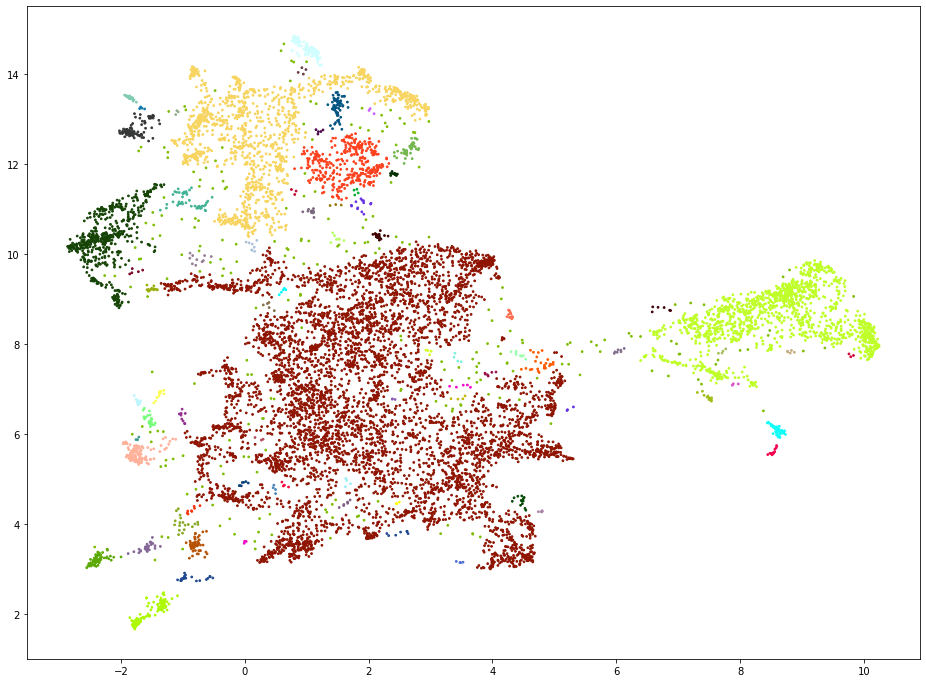

In [52]:
db=DBSCAN(eps=0.12, min_samples=3)
db_clusters=db.fit_predict(umaped_vct)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()


In [53]:
clusters=list(set(db_clusters))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(news.Header):
        if db_clusters[i]==c:
            print(a)
            cntr+=1
            if cntr==3:
                break

0
«Королева дерьмовых роботов» перенесла операцию на мозге
СК заинтересовался задержанием аутиста московскими полицейскими
Киевляне перекрыли проспект из-за сбитого полицейскими ребенка-велосипедиста
1
У Су-57 нашли «тайные ноу-хау»
Донецкие «Чебурашки» отомстили за гибель командира ополчения Мамая
«Центр Хруничева» усохнет
2
Знарок лишился еще одного поста
Российская легкоатлетка одержала 40 побед подряд
Уткин обозвал Черчесова медной статуей
3
В Google обнаружили «самый странный» сбой
Госдума потратит миллионы рублей на изучение опыта борьбы с бедностью
Canon распрощался с пленочной эпохой
4
Нидерланды задумались привлечь Киев к ответственности за крушение «Боинга»
Поляки спустя восемь лет обнаружили следы взрывчатки на Ту-154 Качиньского
Нидерланды сняли с Украины ответственность за гибель MH17 в Донбассе
5
Выявлен новый способ продления жизни
Доказана эффективность вакцины против рака мозга
Ученые обнаружили дешевый способ борьбы с раком
6
Авиалайнер совершил вынужденную посадку из

Попробуем теперь провести кластеризацию в исходном пространстве.

Предварительно прикинем значение $\epsilon$ по расстоянию до ближайших соседей. Для этого используем функцию для построения графа k ближайших соседей из sklearn.

In [28]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

In [55]:
# Строит разреженный граф, в котором на месте связей с ближайшими соседями стоят единицы.
wm = kneighbors_graph(w2v_vectors, 3, n_jobs=-1)

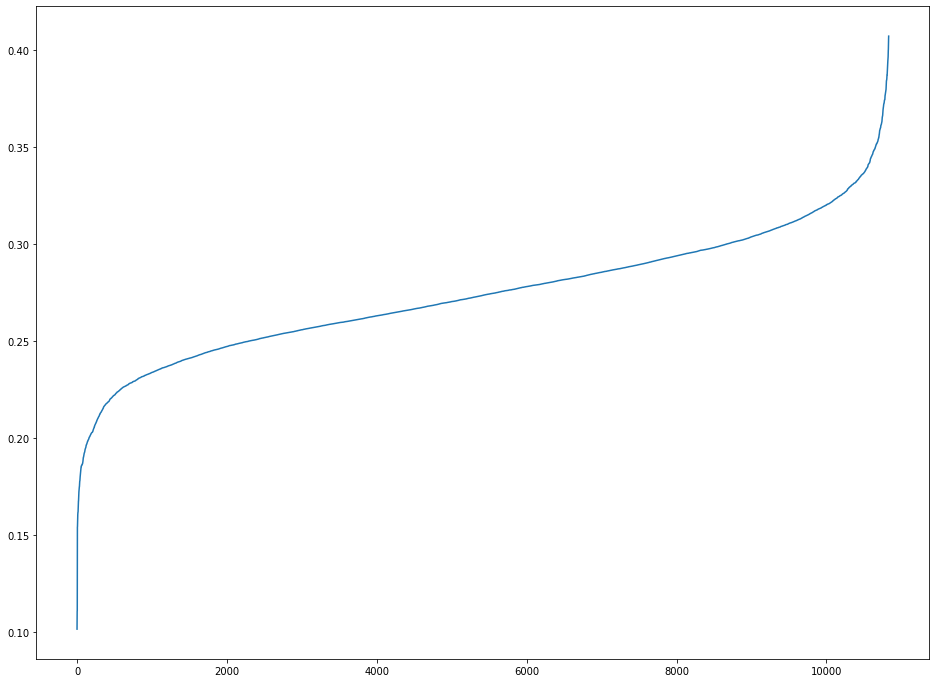

In [56]:
nzr, nzc = wm.nonzero()
neighbours = np.zeros(len(w2v_vectors))
for r, c in zip(nzr, nzc):
    neighbours[r] += np.linalg.norm(v1-w2v_vectors[c])
    
neighbours=sorted(neighbours/3)
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()    

Теперь проведем кластеризацию.

0


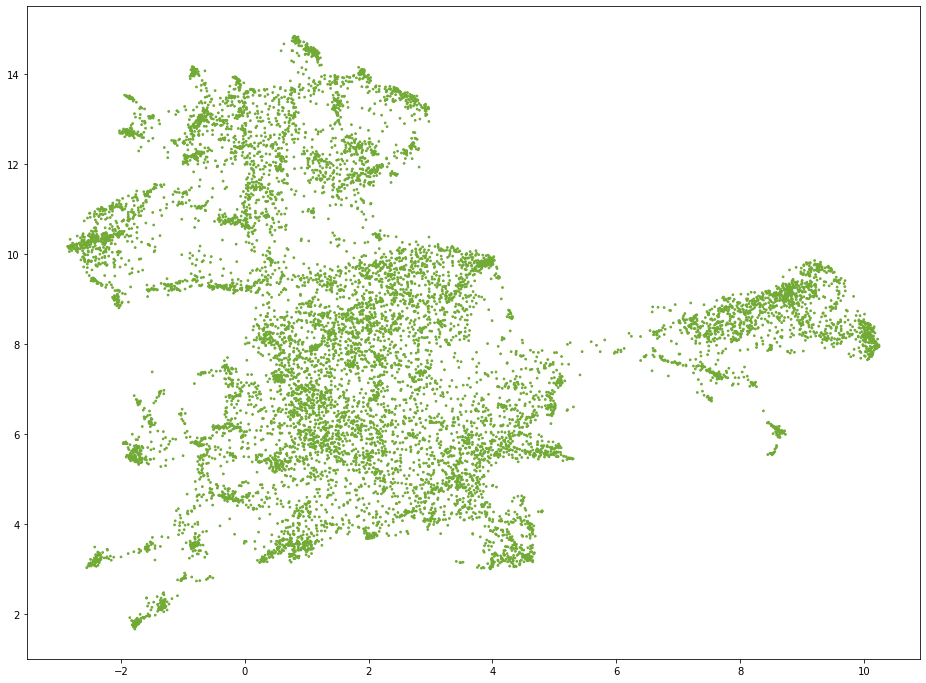

In [57]:
db=DBSCAN(eps=0.8, min_samples=3)
db_clusters=db.fit_predict(w2v_vectors)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [58]:
clusters=list(set(db_clusters))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(news.Header):
        if db_clusters[i]==c:
            print(a)
            cntr+=1
            if cntr==3:
                break

0
«Королева дерьмовых роботов» перенесла операцию на мозге
У Су-57 нашли «тайные ноу-хау»
Знарок лишился еще одного поста


Теперь вернемся к научным статьям.

При объединении всех векторов текста происходит размытие его смысла за счет того, что некоторые понятия хоть и являются близкими, но имеют различия. Вместо того, чтобы брать само слово, давайте объединим все слова одной группы и будем брать их центроид. Заодно посмотрим какие слова попадают в одну группу.

In [45]:
%%time
sci_texts['NText'] = sci_texts['Text'].map(lambda x:' '.join(normalizePymorphy3(x)))

CPU times: user 34.2 s, sys: 0 ns, total: 34.2 s
Wall time: 34.2 s


In [10]:
%%time
dct = {}
# Бежим по статьям.
for article in sci_texts.NText:
    # Берем слово. Потом берем 4 соседа слева и справа.
    words = article.split(' ')
    for i, word1 in enumerate(words[4:-5]):
        for j, word2 in enumerate(words[i-4:i+4]):
            if i!=j:
                # Если основного слова еще не встречалось - добавляем его.
                if word1 not in dct.keys():
                    dct[word1] = {}
                cdict = dct[word1]
                # Говорим, что эти два слова еще раз встретились вместе.
                cdict[word2] = cdict.get(word2, 0) +1


CPU times: user 45 s, sys: 375 ms, total: 45.4 s
Wall time: 45.4 s


In [11]:
# Возьмем слова, которые встречаются больше чем с 10 другими словами, каждое из которых встречается чаще 5 раз.
fd = {w:{k:np.log10(i) for k,i in dct[w].items() if i>5} for w in dct.keys() 
      if len([dct[w][k] for k in dct[w] if dct[w][k]>5])>10}

In [24]:
# Берем вектора слов.
sci_vects = []
sci_words = []
for word in fd.keys():
    try:
        sci_vects.append(model.wv[word])
        sci_words.append(word)
    except Exception:
        pass

In [25]:
# Посмотрим как вообще слова распределены в пространстве.
sci_map = UMAP()
sci_reduced = sci_map.fit_transform(sci_vects)

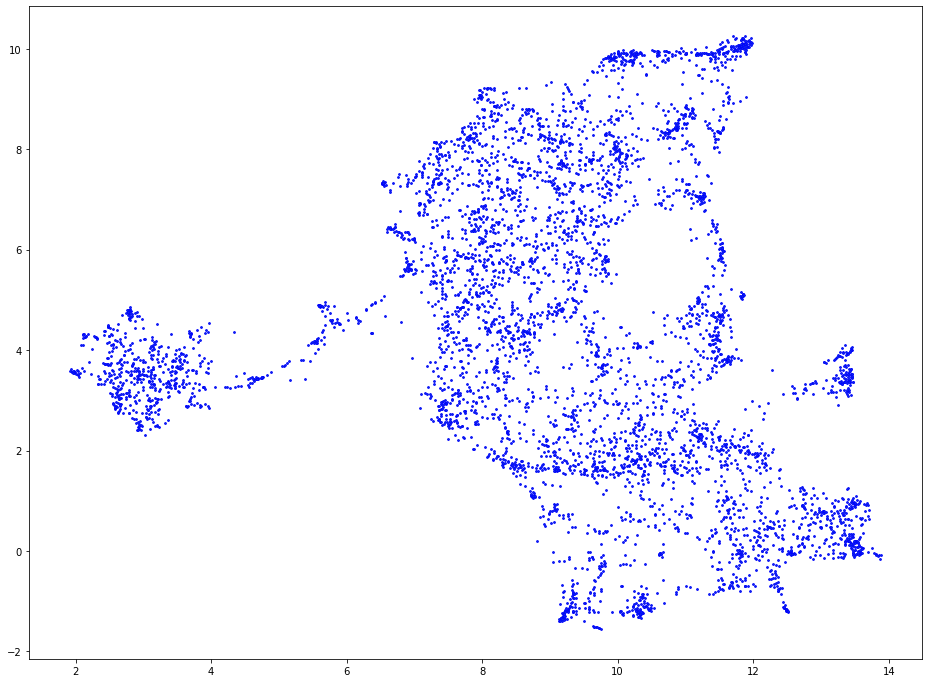

In [26]:
fig, ax = plt.subplots()
ax.scatter(sci_reduced[:, 0], sci_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=3)
plt.show()

In [29]:
%%time
# Кластеризуем, в среднем по два слова на кластер.
sci_clust_no = int(len(sci_vects)/2)
km_clustering = KMeans(n_clusters=sci_clust_no)
sci_clusters = km_clustering.fit_predict(sci_vects)

CPU times: user 5min 13s, sys: 4min 6s, total: 9min 19s
Wall time: 1min 25s


In [30]:
# Какие слова попадают в один кластер.
clust_no=6

sci_words_sorted = sorted(zip(sci_clusters, sci_words), key= lambda x:x[0])
print([word[1] for word in sci_words_sorted if word[0]==clust_no])

['спец_NOUN']


In [31]:
# Посчитаем координаты центроидов.
cur_clust = sci_words_sorted[0][0]
cur_coord = np.array(model[sci_words_sorted[0][1]])
cur_count = 1
clust_coord = []

for i, word in enumerate(sci_words_sorted[1:]):
    if cur_clust == sci_words_sorted[i+1][0]:
        cur_coord += model[sci_words_sorted[i+1][1]]
        cur_count += 1
    else:
        clust_coord.append(cur_coord/cur_count)
        cur_clust = sci_words_sorted[i+1][0]
        cur_coord = np.array(model[sci_words_sorted[i+1][1]])
        cur_count = 1
        
clust_coord.append(cur_coord/cur_count)


/home/edward/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/edward/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/edward/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [32]:
# Эта функция берет центры кластеров вместо слов.
sci_set = set(sci_words)
sci_words_d = {w[1]:w[0] for w in sci_words_sorted}

def text_to_vec_centr(text):
    text_vec = np.zeros((model.vector_size,), dtype="float32")
    n_words = 0

    for sent in normalizePymorphy2(text):
        for word in sent:
            if word in sci_words_d.keys():
                n_words = n_words + 1
                text_vec = np.add(text_vec, clust_coord[sci_words_d[word]]) 
            else:
                try:
                    text_vec = np.add(text_vec, model_w2v[word]) 
                    n_words = n_words + 1
                except Exception:
                    pass
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


In [33]:
# Строим вектора для слов.
sci_vect2 = []
for text in tqdm(sci_texts.Text):
    sci_vect2.append(text_to_vec_centr(text))

In [34]:
# Посмотрим как распределятся документы при таком подходе.
umap_sci=UMAP()
umaped_vct=umap_sci.fit_transform(sci_vect2)

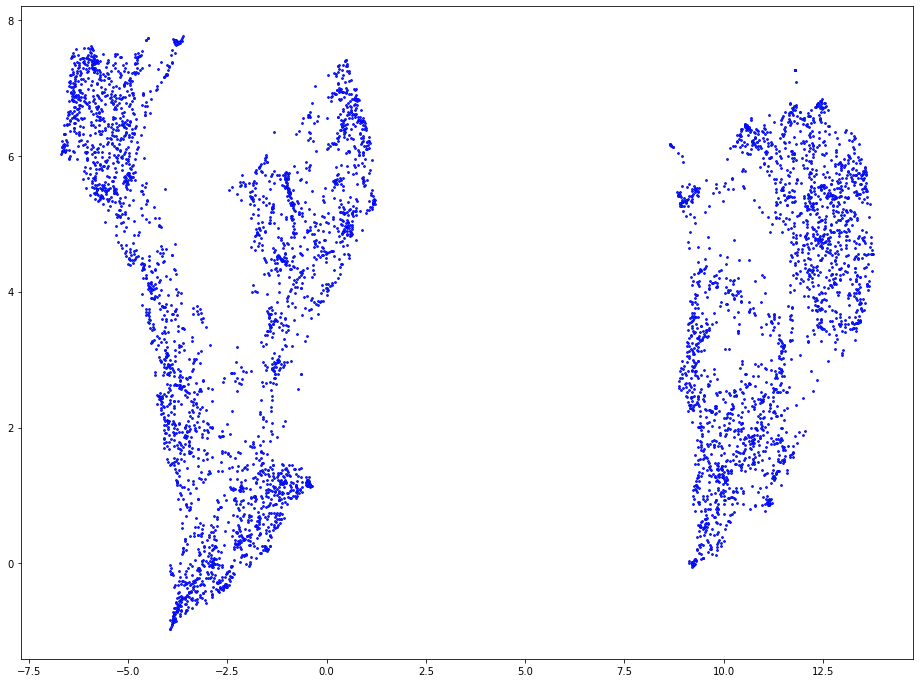

In [35]:
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

104


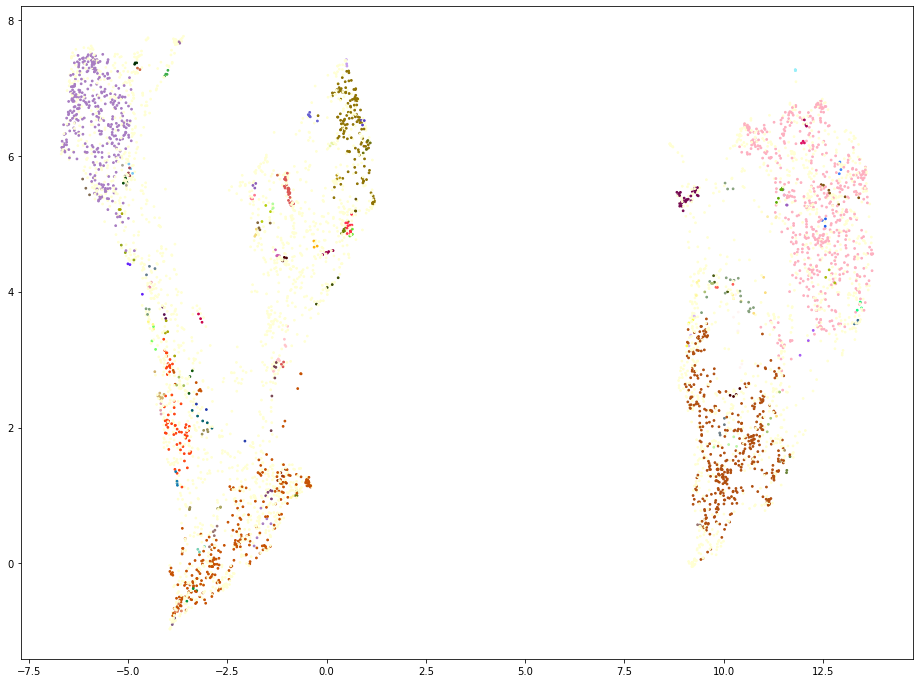

In [38]:
# Раскластеризуем документы.
db=DBSCAN(eps=0.1, min_samples=3)
db_clusters=db.fit_predict(sci_vect2)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [39]:
# Посмотрим на них глазами.
clusters=list(set(db_clusters))

for c in clusters:
    print('          __ ', c, ' __')
    cntr=0
    for i, a in enumerate(sci_texts.Text):
        if db_clusters[i]==c:
            print(a[:200])
            cntr+=1
            if cntr==3:
                break

          __  0  __
                                               ﻿молочные продукты с комбинированной жировой фазой                н.а. лапшинская, н.а. драгун, ю.ю. аленичева__________                проблема ресурсос
                                               ﻿молочные продукты с комбинированной жировой фазой                н.а. лапшинская, н.а. драгун, ю.ю. аленичева__________                проблема ресурсос
                                               ﻿проблемы формировйния и сохранения качества жененного мармепапа                табаторович а.н.,                аспирант сибирского университета потреби
          __  1  __
                                               ﻿отраслевые рынки и рыночная инфраструктура                удк 338.3.01: 338.439:336.01                формирование вертикально-интегрированных образован
                                               ﻿отраслевые рынки и рыночная инфраструктура                удк 338.3.01: 338.439:336.01                формир

А теперь поступим по-другому. Разделим слова на 50 кластеров, а в качестве вектора признаков документа будем брать число слов данного документа, попадающих в каждый кластер.

In [40]:
%%time
cluster_space_size = 50
km_clustering = KMeans(n_clusters=cluster_space_size)
sci_clusters = km_clustering.fit_predict(sci_vects)

CPU times: user 9.32 s, sys: 7.73 s, total: 17.1 s
Wall time: 2.49 s


In [41]:
# Эта функция берет для документа количество слов по кластерам..
sci_set = set(sci_words)
sci_words_d = {w[1]:w[0] for w in sci_words_sorted}

def text_to_centoids(text):
    text_vec = np.zeros((cluster_space_size,), dtype="float32")
    n_words = 0

    for sent in normalizePymorphy2(text):
        for word in sent:
            if word in sci_words_d.keys():
                n_words = n_words + 1
                text_vec[clust_coord[sci_words_d[word]]] += 1
    
    if np.sum(text_vec) != 0:
        text_vec /= np.sum(text_vec)
    return text_vec


In [42]:
clust_coord[sci_words_d['процесс_NOUN']]

array([ 0.33155712,  0.05553519, -0.14316417, -0.04949955, -0.0763751 ,
       -0.04419433, -0.02839714,  0.16169918,  0.00357711, -0.29745767,
       -0.12215982, -0.1990196 , -0.08758864, -0.07068957,  0.03020463,
        0.12210603,  0.0177762 , -0.15746038, -0.05345253,  0.06577597,
       -0.20488228,  0.08818662,  0.27775097,  0.23939362, -0.05737942,
       -0.07222392, -0.03179961,  0.08791202, -0.24249178,  0.13550611,
       -0.06791328, -0.19331242, -0.10549603,  0.17458159, -0.2269271 ,
        0.00932662, -0.05992916,  0.12344474, -0.18728073, -0.17691135,
        0.08604977, -0.07558709, -0.17661758,  0.06467748,  0.085577  ,
       -0.04310354,  0.2098683 , -0.1143565 , -0.08538092, -0.06637716],
      dtype=float32)

In [43]:
# Эта функция берет для документа количество слов по кластерам..
sci_set = set(sci_words)
sci_words_d = {w[1]:w[0] for w in sorted(zip(sci_clusters, sci_words), key= lambda x:x[0])}

def text_to_centoids(text):
    text_vec = np.zeros((cluster_space_size,), dtype="float32")
    n_words = 0

    for word in text.split():
        if word in sci_words_d.keys():
            text_vec[sci_words_d[word]] += 1
    
    if np.sum(text_vec) != 0:
        text_vec /= np.sum(text_vec)
    return text_vec


In [46]:
# Строим вектора для слов.
sci_vect3 = []
for text in tqdm(sci_texts.NText):
    sci_vect3.append(text_to_centoids(text))

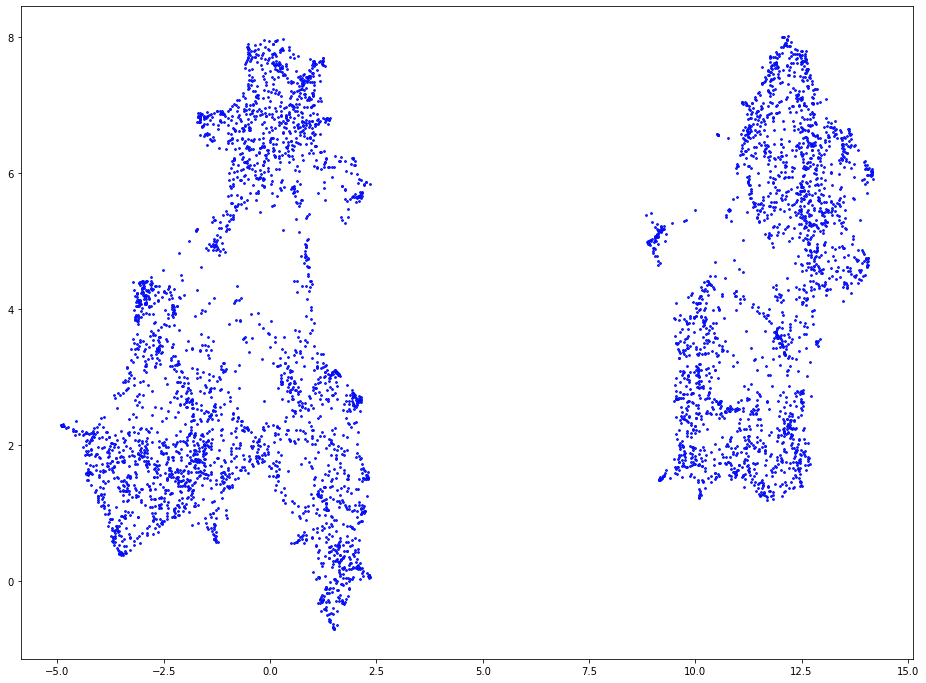

In [47]:
# Посмотрим как распределятся документы при таком подходе.
umap_sci=UMAP()
umaped_vct=umap_sci.fit_transform(sci_vect3)

fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

89


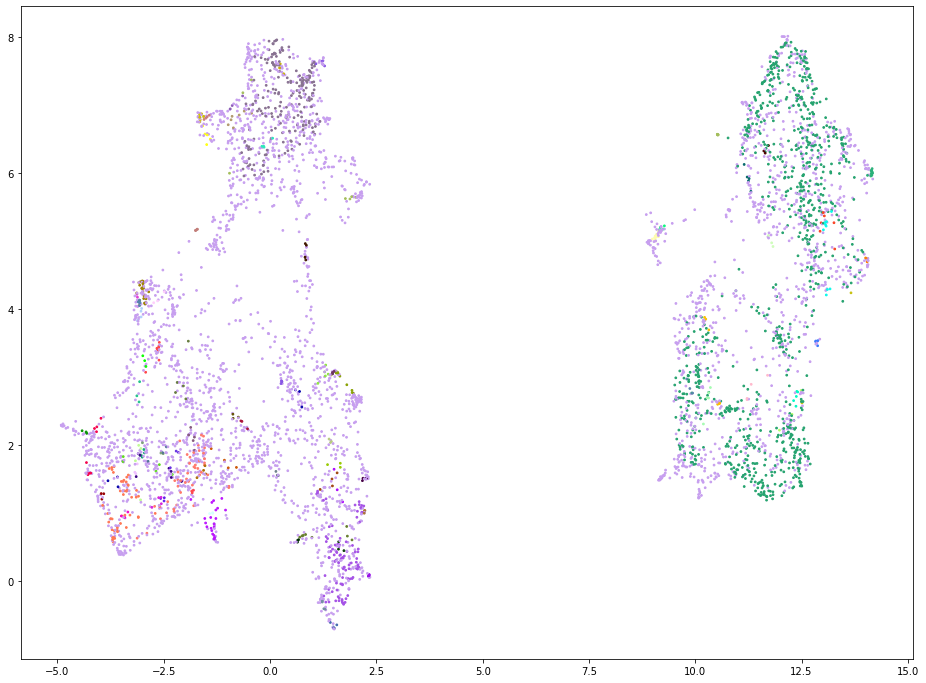

In [48]:
# Раскластеризуем документы.
db=DBSCAN(eps=0.075, min_samples=3)
db_clusters=db.fit_predict(sci_vect3)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [49]:
# Посмотрим на них глазами.
clusters=list(set(db_clusters))

for c in clusters:
    print(f'__ {c} __')
    cntr=0
    for i, a in enumerate(sci_texts.Text):
        if db_clusters[i]==c:
            print(a[:200])
            cntr+=1
            if cntr==3:
                break

__ 0 __
                                               ﻿влияние компонентного состава переработанных сыров на формирование производственного ассортимента                н.в. данилова                проблема п
                                               ﻿влияние компонентного состава переработанных сыров на формирование производственного ассортимента                н.в. данилова                проблема п
                                               ﻿библиографический список                1.	растительные ресурсы ссср: цветковые растения, их химический состав, использование — л.: наука, 1988. — 357 с
__ 1 __
                                               ﻿удк 557.1:664.6/7                биотехнологическая характеристика соевых продуктов © 2007 г. м.п. могильный                the problem of protein suppl
                                               ﻿переработка продукции сельского хозяйства                удк 638.178.2 (571.63)                с.п. присяжная, л.м. уварова, е.а. га

In [50]:
from gensim.models.fasttext import FastText

In [51]:
#model_ft = KeyedVectors.load_fasttext_format('data/araneum_none_fasttextskipgram_300_5_2018.tgz', binary=True)

#model_ft = FastText.load('data/araneum_none_fasttextskipgram_300_5_2018.tgz')


In [52]:
tmp_dict2 = {} # Кеш значимых слов.

morph = pymorphy2.MorphAnalyzer()

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy3(text):
    output = []
    # Делим на предложения самым страшным из возможных образов.
    sentences = text.split('.')
    for sentence in sentences:
        tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', sentence)
        # Берем предложения не менее чем из 5 слов.
        if len(tokens)<=4:
            continue
        words = []
        for t in tokens:
            # Если токен уже был закеширован, быстро возьмем результат из него.
            if t in tmp_dict2.keys():
                words.append(tmp_dict2[t])
            # Слово еще не встретилось, будем проводить медленный морфологический анализ.
            else:
                pv = morph.parse(t)
                if pv[0].tag.POS != None:
                    # Отправляем слово в результат, ...
                    words.append(pv[0].normal_form)
                    # ... и кешируем результат его разбора.
                    tmp_dict2[t] = pv[0].normal_form
        output.append(words)
                    
    return output

In [55]:
all_sentences = []
for text in tqdm(news.News):
    all_sentences.extend(normalizePymorphy3(text))

In [ ]:
%%time
# список параметров, которые можно менять по вашему желанию
num_features = 300  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 3     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели


model_ft = FastText(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

In [ ]:
model_ft.init_sims(replace=True)

In [ ]:
model_ft.save("data/fast_text_news.bin")

In [ ]:
model_ft = FastText.load("data/fast_text_news.bin")
#model_ft = FastText.load('data/araneum_none_fasttextskipgram_300_5_2018.tgz')
# Мне не хватило 16 Гб оперативной памяти, чтобы загрузить эту модель.
#model_ft = FastText.load_fasttext_format("data/cc.ru.300.bin.gz")

In [ ]:
model_ft.wv['король_']-model_ft.wv['мужчина_']+model_ft.wv['женщина_']- model_ft.wv['королева_']


In [ ]:
from gensim.models import KeyedVectors # Семантические вектора.


In [ ]:
#model_ft.wv.most_similar(positive=[u'пожар'])
#model_ft.wv.most_similar(positive=[u'пожар'], negative=[u'пламя'])
#model_ft.wv.most_similar(positive=[u'топливо_'], negative=[u'нефть_'])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'император_NOUN' ], negative=[u'мужчина_NOUN'])
#model_ft.most_similar(positive=[u'король_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
#model_ft.most_similar(positive=[u'король_', u'женщина_'], negative=[u'мужчина_'])
#model_ft.most_similar(positive=[u'король', u'женщина'], negative=[u'мужчина'])
#model_ft.most_similar(positive=[u'президент', u'женщина'], negative=[u'мужчина'])
#model_ft.most_similar(negative=[u'король', u'мужчина'], positive=[u'женщина'])
#model_ft.most_similar(positive=[u'женщина_', u'король_'])
#model_ft.most_similar(positive=['германия_', 'москва_' ], negative=['берлин_'])
print(model_ft.wv.most_similar(positive=[u'король_', u'женщина_'], negative=[u'мужчина_']), "\n\n",
model_ft.wv.most_similar([model_ft.wv['король_']-model_ft.wv['мужчина_']+model_ft.wv['женщина_']]))

### Что осталось за кадром?

- BERT
- DeepPavlov
- Онтологии.
- graph2vec (последовательность прослушанных песен, просмотр товаров, ...).

In [ ]:
from gensim.models.fasttext import load_facebook_model
#import compress_fasttext
big_model = load_facebook_model('path-to-original-model').wv
small_model = compress_fasttext.prune_ft_freq(big_model, pq=True)
small_model.save('path-to-new-model')